# Friedman test 

In [8]:
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import pandas as pd

model_names = ['MNB', 'KNN', 'DT', 'RF', 'SGD'] #columns
measures = ["CVM","Specificity","AUC","Precision","Recall","F1-score"] #rows
            
accuracies = np.array( [[86.10,74.12,82.67,81.89,88.73],
                       [82.6,31.52,89.8,90.4,87.4],
                       [93.2,80,86.87,88.65,94.4],
                       [0.83,0.79,0.88,0.88,0.87],
                       [0.90,0.65,0.75,0.73,0.87],
                       [0.86,0.71,0.81,0.80,0.87]])


# Perform the Friedman's test
statistic, p_value = friedmanchisquare(*(accuracies.T))

print("Friedman's test statistic:", statistic)

print("p-value:", p_value)

pd.DataFrame(accuracies,columns=model_names,index=measures )

Friedman's test statistic: 13.747899159663858
p-value: 0.008144684356603314


,MNB,KNN,DT,RF,SGD
CVM,86.10,74.12,82.67,81.89,88.73
Specificity,82.60,31.52,89.80,90.40,87.40
AUC,93.20,80.00,86.87,88.65,94.40
Precision,0.83,0.79,0.88,0.88,0.87
Recall,0.90,0.65,0.75,0.73,0.87
F1-score,0.86,0.71,0.81,0.80,0.87


The Friedman's test statistic is a statistical test used to determine whether there are significant differences in performance between multiple models.In this case, the Friedman test statistic of 13.75 and the p-value of 0.0081 suggest that there is a significant difference in the performance of the classifiers.

# Nemenyi test 

In [9]:
# Conduct the Nemenyi post-hoc test
nemenyi = sp.posthoc_nemenyi_friedman(accuracies)
nemenyi.columns = model_names
nemenyi.index = model_names
nemenyi

,MNB,KNN,DT,RF,SGD
MNB,-1.000000,0.048539,0.900000,0.900000,0.900000
KNN,0.048539,-1.000000,0.098676,0.150575,0.004751
DT,0.900000,0.098676,-1.000000,0.900000,0.835462
RF,0.900000,0.150575,0.900000,-1.000000,0.731848
SGD,0.900000,0.004751,0.835462,0.731848,-1.000000


Based on this table, it appears that MNB, DT, and SGD have very similar performance, with pairwise scores ranging from 0.73 to 0.9. KNN and RF have lower pairwise scores with the other models, ranging from 0 to 0.15.

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x257a8fea8e0>)

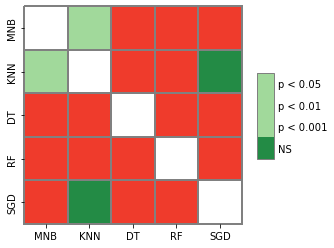

In [10]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(nemenyi, **heatmap_args)

Based on the Nemenyi test, it appears that there are statistically significant differences between the performance of the five models that were tested. The results indicate that:

Multinomial Naive Bayes (MNB) is significantly different from K-Nearest Neighbors (KNN), and KNN is significantly different from Stochastic Gradient Descent (SGD).
Decision Trees (DT) and Random Forests (RF) do not show significant differences in performance with any of the other models.
MNB, DT, and RF are not significantly different from each other.
It's worth noting that the Nemenyi test is a pairwise comparison test, so the results only indicate whether there is a significant difference in performance between pairs of models, rather than providing an overall ranking of the models.